## 1. Defining the Question

**WEEK 2 CORE IP**

The research problem is **to figure out how we can predict which individuals are most likely to have or use a bank account.** Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

### b) Defining the Metric for Success

### d) Recording the Experimental Design

## 2. Reading the Data

In [151]:
# Importing Pandas
# 
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import ttest_1samp
 

In [ ]:
# Dataset decsription
#
df0 = pd.read_csv("http://bit.ly/VariableDefinitions")
df0

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
# Reading and previewing the dataset
#
url = "http://bit.ly/FinancialDataset"
df = pd.read_csv(url)

# previedthe first five rows od the dataset
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# previedthe last five rows od the dataset
df.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## 3. Checking the Data

In [ ]:
# Checking the dataset size, shape and info
def size_shape(data):
    return data.info(), data.shape, data.size


size_shape(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


(None, (23524, 13), 305812)

## 4. External Data Source Validation

### a.Validation

In [ ]:
# Accuracy
# 
df.nunique()
# Data is valid in that it only contains data from the four countrues we are intresinterested in (kenya,Ugand,tanzania and Rwanda)

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [ ]:
# Checking if there was data collected from people bellow the age of consent if the four countries
above_18 = df[df["Respondent Age"] < 18]
above_18.head()
# There was data that was collected from people bellow the age of consent if the four countries

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
52,Kenya,2018,uniqueid_53,No,Urban,No,5.0,16.0,Female,Other relative,Single/Never Married,Primary education,Remittance Dependent
53,Kenya,2018,uniqueid_54,No,Rural,Yes,2.0,17.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
76,Kenya,2018,uniqueid_77,No,Urban,No,4.0,17.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
81,Kenya,2018,uniqueid_82,No,Rural,No,4.0,17.0,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
104,Kenya,2018,uniqueid_105,Yes,Urban,No,4.0,16.0,Female,Other relative,Single/Never Married,Secondary education,Remittance Dependent


1. Data is valid in that it only contains data from the four countrues we are intresinterested in (kenya,Ugand,tanzania and Rwanda)
2. There was data that was collected from people bellow the age of consent if the four countries

## 5. Tidying the Dataset

In [ ]:
# Completeness
# Checking for null values

df.isnull().sum()
# drop null values

df.dropna(axis = 0, how ='any', inplace=True)
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#Consistency
#Checking for duplicates

df.duplicated().sum()

# Thre are no duplicate records

0

In [ ]:
# Uniformity
df.columns = ['country', 'year', 'uniqueid', 'has_a_Bank_account', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']
df.head(2)

,country,year,uniqueid,has_a_Bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
# Converting float to int
df['household_size'].astype(int)
df['age_of_respondent'].astype(int)

0        24
1        70
2        26
3        34
4        26
         ..
23519    48
23520    27
23521    27
23522    30
23523    20
Name: age_of_respondent, Length: 23343, dtype: int64

## 6. Exploratory Analysis

- Ploting the **univariate summaries** and recording our observations

- To figure out how we can predict which individuals are most likely to have or use a bank account

In [ ]:
# Age of respondents crosstab
pd.crosstab(index=df['uniqueid'], columns=df['age_of_respondent']).head()

age_of_respondent,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
uniqueid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
uniqueid_1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
uniqueid_10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
uniqueid_100,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
uniqueid_1000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
uniqueid_1001,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Frequency table for people with bank accounts
#
frequency_df = pd.DataFrame(df, columns=['has_a_Bank_account', 'location_typ', 'cellphone_access', 'age_of_respondent', 'gender_of_respondent', 'education_level', 'marital_status', 'job_type'])
frequency_df.has_a_Bank_account.value_counts()

No     20046
Yes     3297
Name: has_a_Bank_account, dtype: int64

In [ ]:
# Frequency table for people with cellpones
#
frequency_df.cellphone_access.value_counts()

Yes    17334
No      6009
Name: cellphone_access, dtype: int64

In [ ]:
# Frequency table for gender of respondents
#
frequency_df.gender_of_respondent.value_counts()

Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64

In [ ]:
# Frequency table for age of respondents
#
frequency_df.age_of_respondent.value_counts().head(5)

30.0    1043
35.0     831
25.0     785
28.0     742
32.0     707
Name: age_of_respondent, dtype: int64

In [ ]:
# Frequency table for people's education levels 
#
frequency_df.education_level.value_counts()

Primary education                  12689
No formal education                4467 
Secondary education                4207 
Tertiary education                 1144 
Vocational/Specialised training    801  
6                                  27   
Other/Dont know/RTA                8    
Name: education_level, dtype: int64

Text(0.5, 1.0, 'Bar graph visualization for education level')

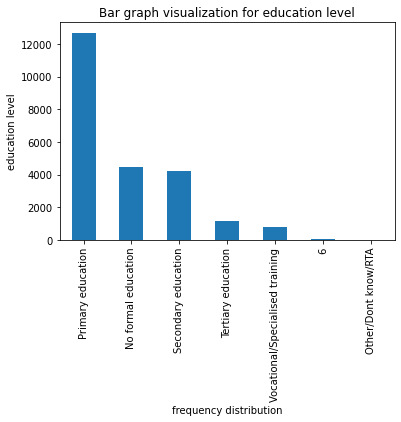

In [ ]:
# Frequency table bar graph visualization for education level
#
df['education_level'].value_counts().head(10).plot.bar()
plt.xlabel('frequency distribution')
plt.ylabel('education level')
plt.title('Bar graph visualization for education level')

In [ ]:
# Frequency table for marital status
#
frequency_df.marital_status.value_counts()

Married/Living together    10700
Single/Never Married       7903 
Widowed                    2683 
Divorced/Seperated         2049 
Dont know                  8    
Name: marital_status, dtype: int64

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

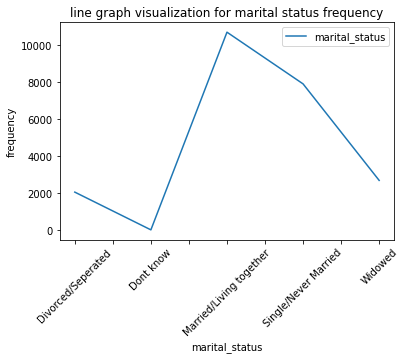

In [ ]:
# Frequency table line graph visualization for marital status
#
df['marital_status'].value_counts().sort_index().plot.line()
plt.xlabel('marital_status')
plt.ylabel('frequency')
plt.title('line graph visualization for marital status frequency')
plt.legend()
plt.xticks(rotation = 45)

In [ ]:
# Frequency table for job type
#
frequency_df.job_type.value_counts()

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: job_type, dtype: int64

In [ ]:
# selecting kenya dataframe subset
#
df.groupby(by=["country"])
df_kenya=df[:6068]
df_kenya.head(3)

,country,year,uniqueid,has_a_Bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [ ]:
# Frequency table for countries
#
df["country"].value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

In [ ]:
# selecting Tanzania dataframe subset
df.groupby(by=["country"])

# Split data frame countrywise
df_tanazania=df[14803:21422]
df_tanazania.head(3)

,country,year,uniqueid,has_a_Bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
14858,Tanzania,2017,uniqueid_56,Yes,Urban,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Primary education,Informally employed
14859,Tanzania,2017,uniqueid_57,No,Urban,No,2.0,40.0,Female,Spouse,Single/Never Married,No formal education,Informally employed
14860,Tanzania,2017,uniqueid_58,No,Rural,Yes,2.0,21.0,Female,Spouse,Single/Never Married,Primary education,Informally employed


In [ ]:
# selecting rwanda dataframe subset
df.groupby(by=["country"])

df_rwanda=df[6068:14803]
df_rwanda.head(3)


,country,year,uniqueid,has_a_Bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
6072,Rwanda,2016,uniqueid_5,No,Rural,No,4.0,17.0,Female,Child,Single/Never Married,Primary education,Informally employed
6073,Rwanda,2016,uniqueid_6,No,Rural,Yes,4.0,64.0,Female,Head of Household,Widowed,No formal education,Self employed
6074,Rwanda,2016,uniqueid_7,No,Rural,No,4.0,58.0,Female,Spouse,Married/Living together,No formal education,Informally employed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

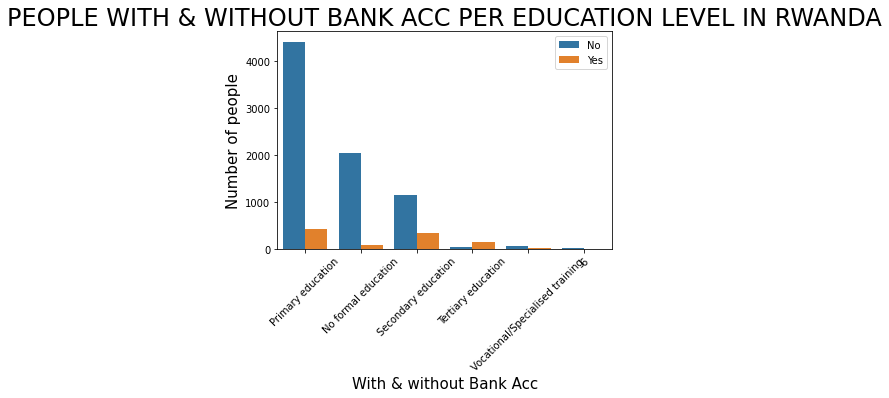

In [ ]:
# PEOPLE WITH & WITHOUT BANK ACC PER EDUCATION LEVEL IN RWANDA
#
plt.title('PEOPLE WITH & WITHOUT BANK ACC PER EDUCATION LEVEL IN RWANDA', fontsize=24)
sns.countplot(df_rwanda["education_level"], hue=df_rwanda["has_a_Bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


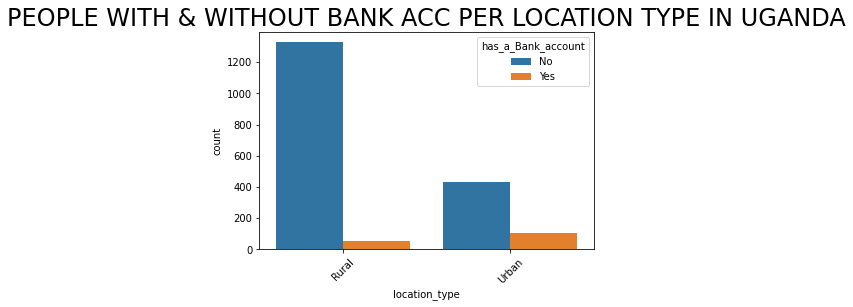

In [ ]:
plt.title('PEOPLE WITH & WITHOUT BANK ACC PER LOCATION TYPE IN UGANDA', fontsize=24)
plt.xticks(rotation = 45)
df.groupby(by=["country"])
df_ug=df[21423:]
sns.countplot(df_ug["location_type"], hue=df_ug["has_a_Bank_account"])

**BIVARIATE ANALYSIS**


**Bivariate Analysis - Numerical & Numerical**

In [ ]:
df.head(1)

,country,year,uniqueid,has_a_Bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


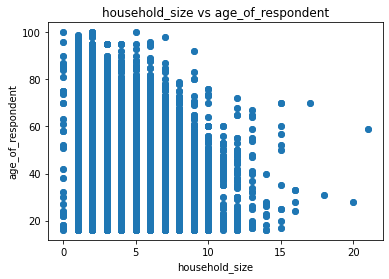

In [133]:
# A scatter plot is visual representation of the relationship between two numerical variables(household_size)&(	Respondent Age)
# (county, age of respondents, family members)
# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'household_size', y = 'age_of_respondent', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df["household_size"] , df["age_of_respondent"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = df["household_size"], y = df["age_of_respondent"], fit_reg=False)

# Giving our scatterplot a title
plt.title('household_size vs age_of_respondent')

# Labelling our x axis
plt.xlabel('household_size')

# Labelling our y axis
plt.ylabel('age_of_respondent')

# We then display our scatterplot as shown below
plt.show()


In [136]:
# Linear correlation quantifies the strength of a linear relationship between two numerical variables.
# r only measures the strength of a linear relationship and is always between -1 and 1 where -1 means perfect negative linear correlation and +1 means perfect positive linear correlation and zero means no linear correlation.
# R LINEAR CORRELATION
# COVAR-  Covariance
# var variance
# Calculating the pearson coefficient
pearson_coeff = df["household_size"].corr(df["age_of_respondent"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["household_size"].corr(df["age_of_respondent"]) 
print(coeff)

-0.11970919507762415
-0.11970919507762415


**Bivariate Analysis - Categorical & Categorical**

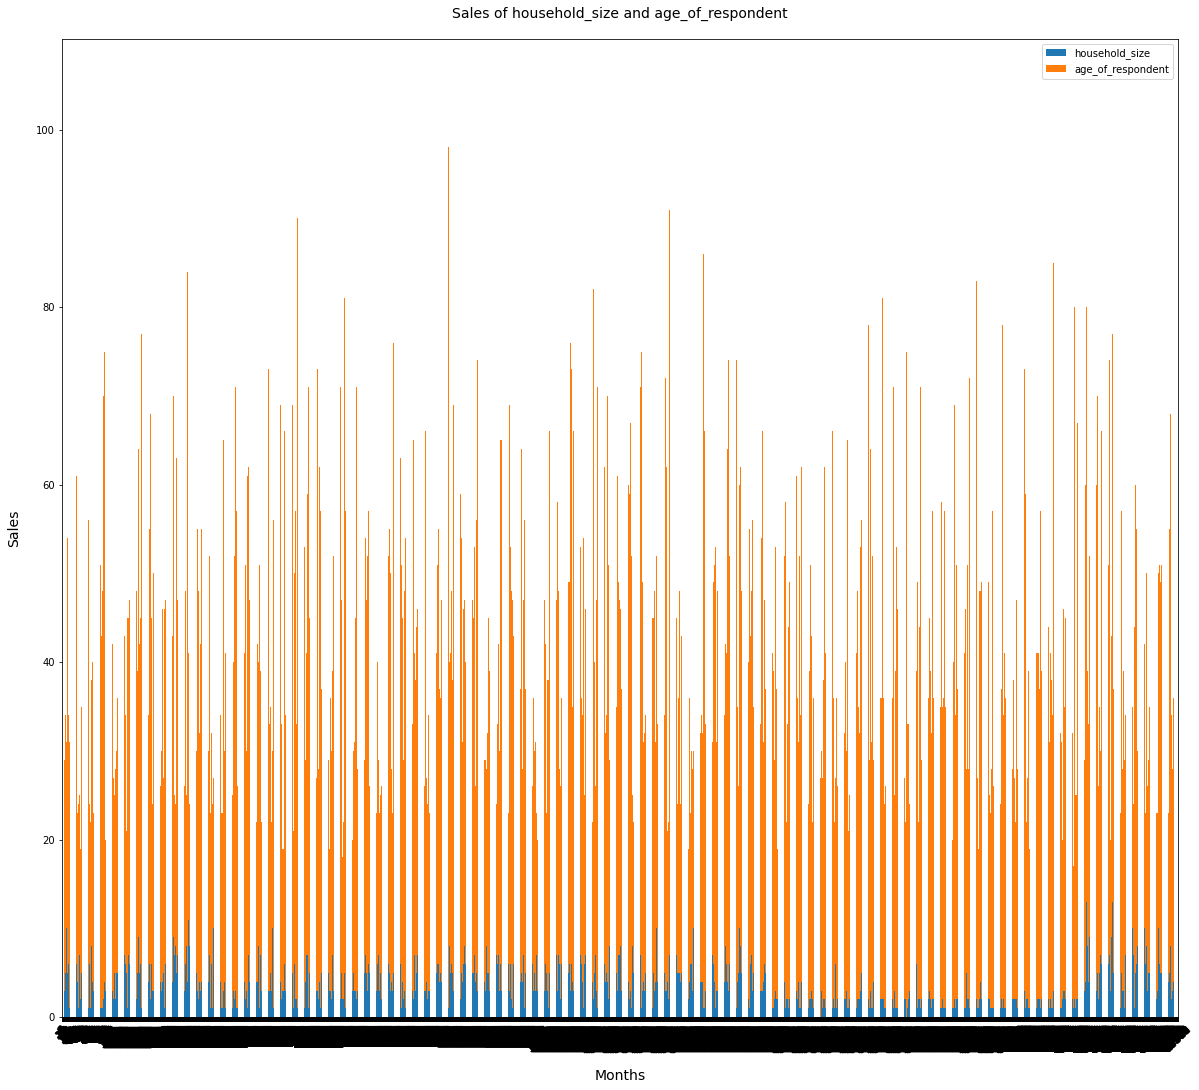

In [162]:
# Stacked Column chart is a useful graph to visualize the relationship between two categorical variables.
# It compares the percentage that each category from one variable contributes to a total across categories of the second variable. 
df[['household_size', 'age_of_respondent']].plot(kind='bar', figsize=(20, 18), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("household_size and age_of_respondent", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("y axis", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("x axis", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

In [ ]:
# A combination chart uses two or more chart types to emphasize that the chart contains different kinds of information.
# The combination chart is the best visualization method to demonstrate the predictability power of a predictor (X-axis) against a target (Y-axis).

In [ ]:
# The chi-square test can be used to determine the association between categorical variables.
# It is based on the difference between the expected frequencies (e) and the observed frequencies (n) in one or more categories in the frequency table.
# A probability of zero shows a complete dependency between two categorical variables and a probability of one means that two categorical variables are completely independent.

**Bivariate Analysis - Categorical & Numerical**

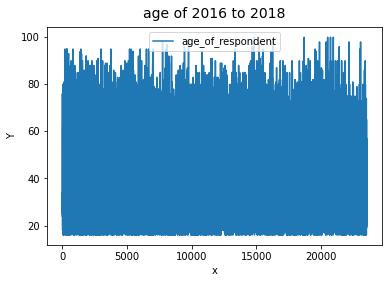

In [163]:
# A line chart with error bars displays information as a series of data points connected by straight line segments. 
# Each data point is average of the numerical data for the corresponding category of the categorical variable with error bar showing standard error.
#
# Plotting our line graph
df[["age_of_respondent"]].plot()

# Giving a title to our line graph
plt.title("age of 2016 to 2018", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Y')

# Labelling the x-axis
plt.xlabel('x')

# Displaying our graph
plt.show()

In [ ]:
# A combination chart uses two or more chart types to emphasize that the chart contains different kinds of information.

In [ ]:
# we use a bar chart to show the distribution of a binned numerical variable and a line chart to show the percentage of the selected category from the categorical variable.
# The combination chart is the best visualization method to demonstrate the predictability power of a predictor (X-axis) against a target (Y-axis).

**Z-test and t-test

In [148]:
# They assess whether the averages of two groups are statistically different from each other. 
# This analysis is appropriate for comparing the averages of a numerical variable for two categories of a categorical variable. 
#
M = df['age_of_respondent'].to_numpy()
stats.zscore(M)

array([-0.89624712,  1.88834928, -0.77517771, ..., -0.71464301,
       -0.53303889, -1.13838594])

In [153]:
df_mean = df["age_of_respondent"].mean()
df_mean1 = df[""]
expected_mean = 31

# Calculating the t-test
t_statistic, p_value = ttest_1samp(df_mean, expected_mean, axis = 0)

# Then displaying the t-statistic
t_statistic

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

**Analysis of Variance (ANOVA)

In [ ]:
# The ANOVA test assesses whether the averages of more than two groups are statistically different from each other.
# This analysis is appropriate for comparing the averages of a numerical variable for more than two categories of a categorical variable.

**Hypothesis Testing**

In [ ]:
#1. State null (H0) and alternative (H1) hypothesis
#   H0: M = what i currently believe
#   H1: M=! = what is being claimed 
#        2 tailed test
# *************************************
#2. Choose level of significance(α)
#     given in the problem
#     area in the tails
# *************************************
#3. Find critical values
#     t value = std unknown & sample size less than 30-- 1 Tailed test
#     z valvalue /z table = standard deviation known
# *************************************
#4. find test statistic
#     video
# *************************************
#5. Draw your conclussiconclusion 

In [154]:
df.head(2)

,country,year,uniqueid,has_a_Bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [161]:
# Step 1: 
# Showing descriptive statistics from pandas.describe()
# --- 
df.groupby("country")['age_of_respondent'].describe()

# Step 2: 
# Showing descriptive statistics from researchpy.summary_cont()
# --- 
rp.summary_cont(df.groupby("country")['age_of_respondent'])

# Step 3: 
# Before the t-test can be conducted, the assumptions of the t-test need 
# to be checked to see if the t-test results can be trusted. The data which we will use must 
# meet those assumptions in order for the test results to be valid.
# 1. The samples are independently and randomly drawn
# 2. The distribution of the residuals between the two groups should follow the normal distribution
# 3. The variances between the two groups are equal
# If any of these assumptions are violated then another test should be used. 
# The dependent variable (outcome being measured) should be continuous which is measured on an interval or ratio scale.
# --- 
stats.levene(setosa['age_of_respondent'], versicolor['age_of_respondent'])

# Step 3:
# We learn that the test is not significant meaning there is homogeneity of variances and we can proceed. 
# If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test.

# Step 4: 
# Next we test the assumption of normality. The residuals needs to be normally distributed. 
# To calculate the residuals between the groups, subtract the values of one group from the values of the other group.
# --- 
diff = setosa['age_of_respondent'] - versicolor['age_of_respondent']

# Step 5: 
# Checking for normality can be done visually or with a formula test. 
# Visually, one can use a p-p plot, a q-q plot, or histogram, and/or one can use the Shapiro-Wilk 
# test to formally test for normality. 
# To test for normality formally, use stats.shapiro() which is from the scipy.stats library that was imported. 
# First let’s check for normality visually with a p-p plot and a histogram plot.
# --- 
stats.probplot(diff, plot= plt)
plt.title('age_of_respondent P-P Plot') 
plt.show()

# Step 5:
# If you are unfamiliar with how to read a p-p or q-q plot, 
# the dots should fall on the red line. If the dots are not on the red line then it’s an indication that 
# there is deviation from normality. Some deviations from normality is fine, as long as it’s not severe.

# Step 6:
# The p-p plot shows that the data maintains normality. Let’s take a look at the histogram next.
# --- 
diff.plot(kind= "hist", title= "age_of_respondent Residuals")
plt.xlabel("******") 
plt.show()


# Step 7: 
# For the formal test on normality
# --- 
stats.shapiro(diff)

# Step 7: 
# The output is not labeled, but the first value is the W test statistic and the second value is the p-value. 
# Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed.
# The data met all the assumptions for the t-test which indicates the results can be trusted 
# and the t-test is an appropriate test to be used.

# Step 8: 
# To conduct the independent t-test using scipy.stats, use the stats.ttest_ind() method.
# ---
stats.ttest_ind(setosa['age_of_respondent'], versicolor['age_of_respondent'])

# Conclusion:
#

NameError: ignored